In [1]:
# Importing Basic Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
# Importing seaborn - it is used to create atractive and useful statistical graphics
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
# removing the unnamed: 0 col

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
# checking for duplicated rows

df.duplicated().sum()

29

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [9]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [10]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
    
    
    
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [11]:
'''
so on observation we can see that if we remove "GB" from RAM,i can 
make it as an integer value then after,now same goes with Memory as 
well as Weight,for Weight i can classify it as floating variable
using the str.replace() as shown ↓
'''

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# converting from string->integer for ram column

#df['Ram'] = df['Ram'].astype('int32')
df['Ram'] = df['Ram'].astype('str')
# converting from string-> float for the weight column

df['Weight'] = df['Weight'].astype('str')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


# Exploratory Data Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\3164208024.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'],color='red')


<Axes: xlabel='Price', ylabel='Density'>

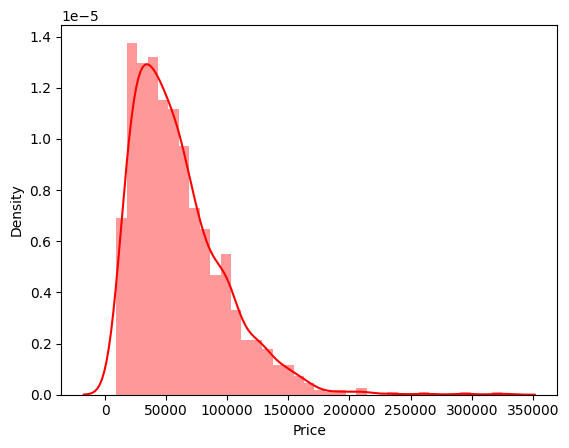

In [13]:
# viewing the distribution of the price column

sn.distplot(df['Price'],color='red')

<Axes: >

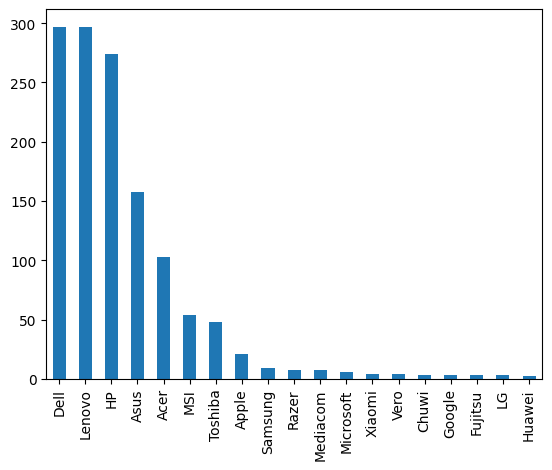

In [14]:
# Let's see the frequency of unique laptop brands in our database using a barplot
df['Company'].value_counts().plot(kind='bar')

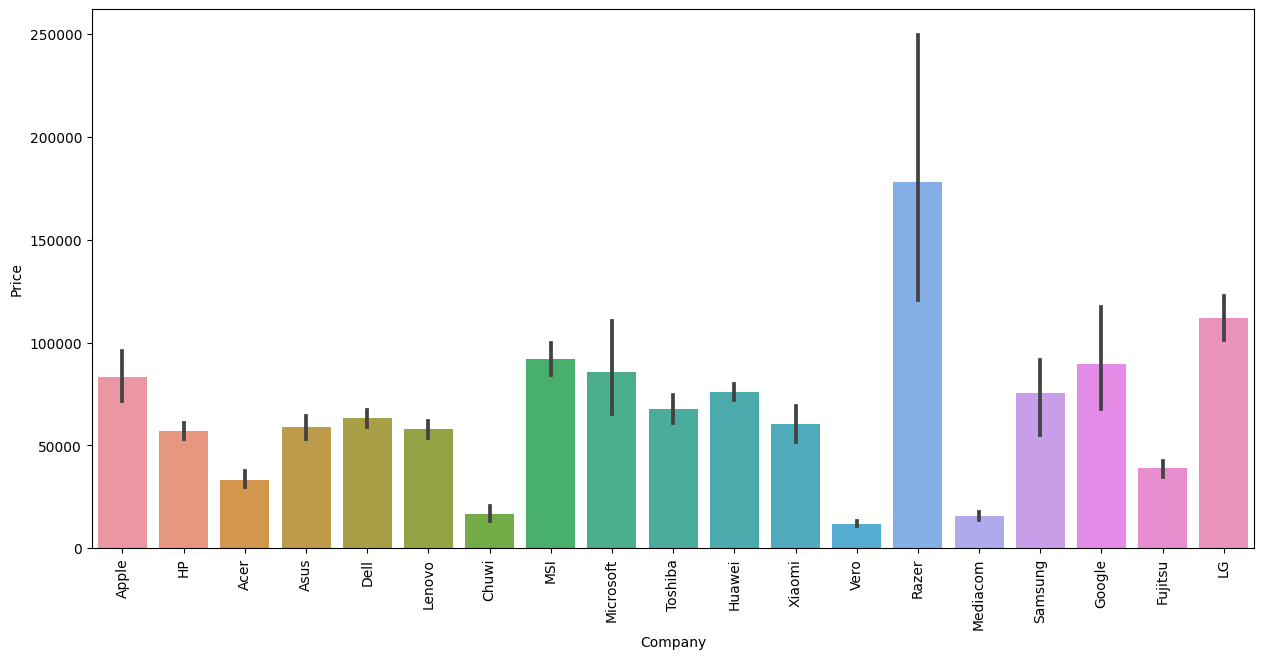

In [15]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary


plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Notebook'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, 'Ultrabook'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

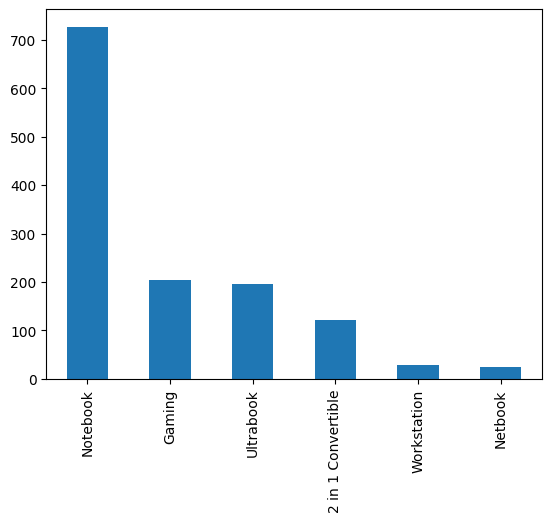

In [16]:
## various types of laptops

df['TypeName'] = df['TypeName'].astype('str')
df['TypeName'].value_counts().plot(kind='bar')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

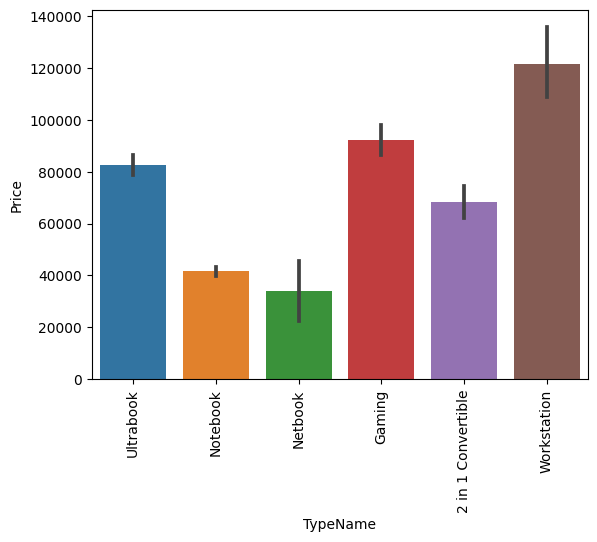

In [17]:
# laptop type and variation about the price 
sn.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')



<Axes: xlabel='Inches', ylabel='Price'>

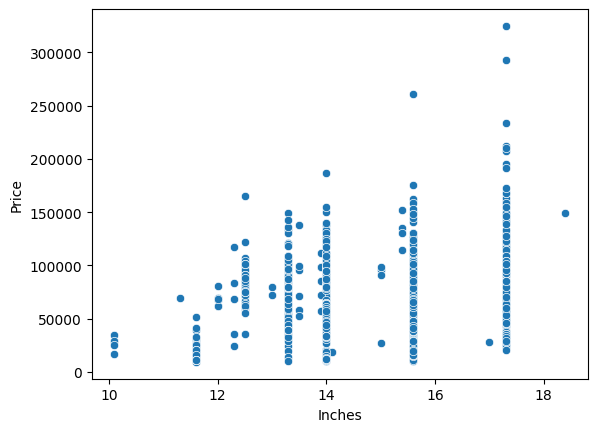

In [18]:
# variation of inches towards the price
sn.scatterplot(x = df['Inches'],y = df['Price'])

**For the `Screen Resolution` column we have many types of Screen Resolutions out there as shown `Touch Screen` and `Normal` and `IPS Panel` are the 3 parts on basis of which we can segregate the things**

In [19]:
df['ScreenResolution'] = df['ScreenResolution'].astype('str')
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [20]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 
                                                      if 'Touchscreen' in element else 0)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [21]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
743,Lenovo,2 in 1 Convertible,14.0,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.7,53226.72,1
1234,Apple,Ultrabook,11.6,1366x768,Intel Core i5 1.6GHz,4,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08,51095.52,0
838,Lenovo,Notebook,14.0,1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.5,17316.00,0
629,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2,96969.60,0
1166,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,74059.20,0


<Axes: >

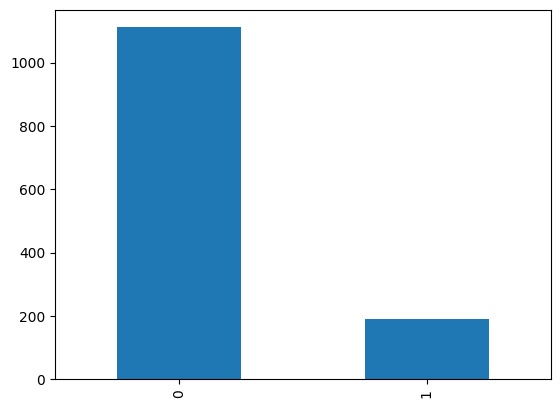

In [22]:
df['TouchScreen'].value_counts().plot(kind='bar')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

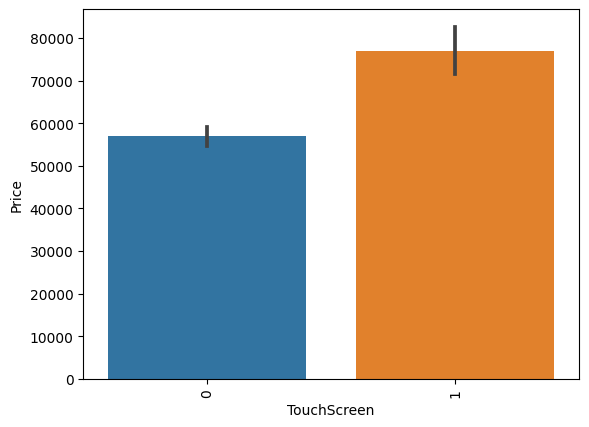

In [23]:
# touch screen on comparision with price of laptop

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

In [24]:
# creating a new col named IPS,does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
156,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.74,33513.1200,1,1
597,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.7,78534.7200,0,1
642,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.14,130536.0000,0,1
272,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 520,Linux,2.14,39164.5296,0,0
236,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.1,20779.2000,0,0


<Axes: >

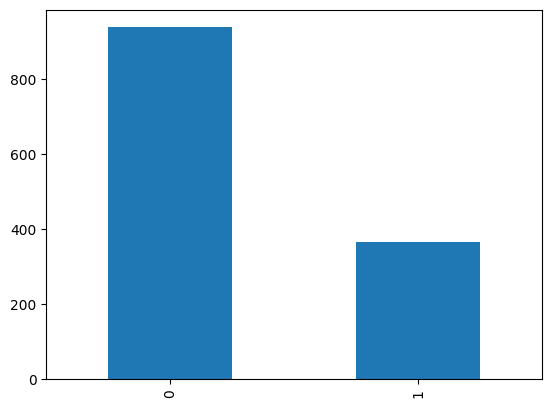

In [25]:

df['IPS'].value_counts().plot(kind='bar')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

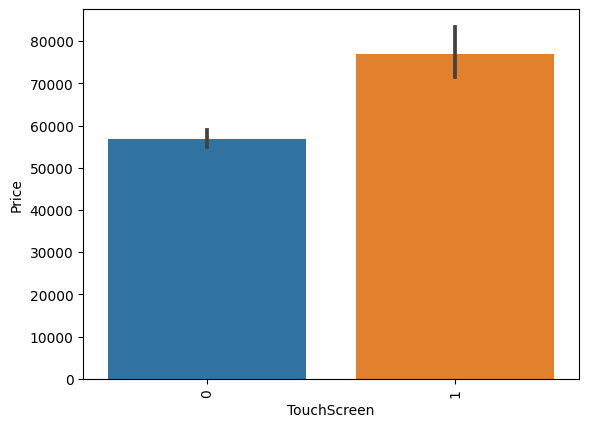

In [26]:
# price variation with respect to the IPS col

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

### Extracting the X Resolution and the Y Resolution

In [27]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [28]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [29]:
'''
So basically from that whole text of the X_res col,we need to 
extract the digits from it,but the problem is the numbers are scattered 
in some cases,that is the reason why i am using regex,if we use this
we will exactly get the numbers which we are looking for!,
so firstly replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+",\d means that integer number and \.? 
all the numbers which come after an number and \d+ the string must end with number


'''


df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [30]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 142.6+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\4032489201.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='plasma')


<Axes: >

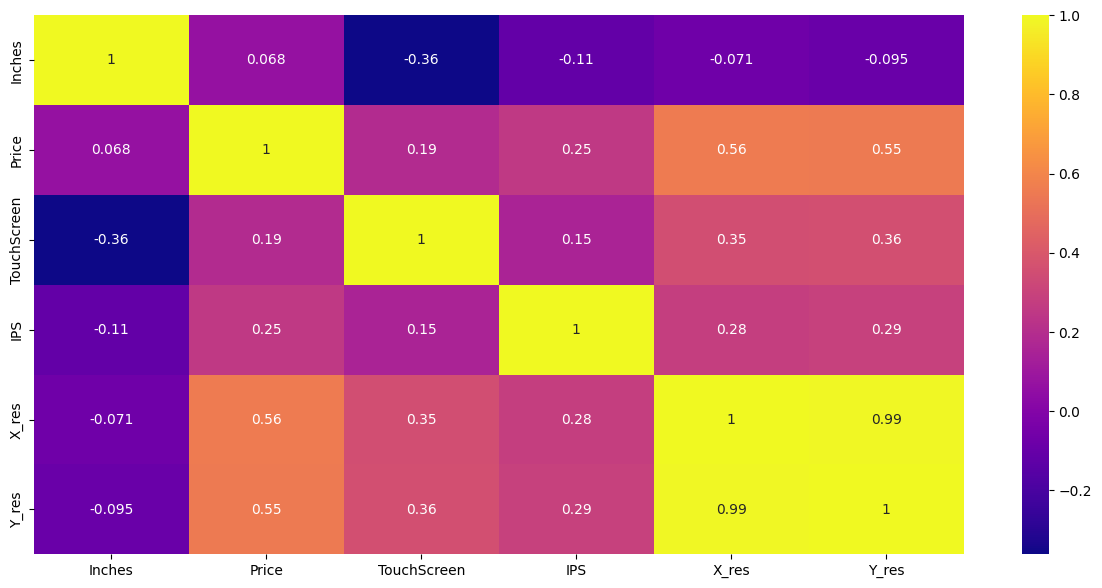

In [31]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [32]:
df.corr()['Price']

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**

**So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [33]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('int'
                                                                         '')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226


In [34]:
df['Inches'] = df['Inches'].astype('str')
df.corr()['Price']

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\3763900380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473264
Name: Price, dtype: float64

**So as we observe from the correlation data that the `PPI` is having good correlation,so we will be using that,as that is a combination of 3 features and that gives collective results of 3 columns,so we will drop `Inches,X_res,Y_res` as well**

In [35]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)



**Now we will work on `CPU` column,as that also has much text data and we need to process it efficiently as we may get good insights from them**

In [36]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

**Most common processors are made by intel right,so we will be clustering their `processors` into different categories like `i5,i7,other`,now other means the processors of intel which do not have i3,i5 or i7 attached to it,they're completely different so that's the reason i will clutter them into `other` and other category is `AMD` which is a different category in whole**

**So if we observe we need to extract the first 3 words of the CPU column,as the first 3 words of every row under the CPU col is the type of the CPU,so we will be using them as shown ↓**

In [37]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5


In [38]:
'''
As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''

def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor'
        
    
    
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5


In [39]:
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

<Axes: >

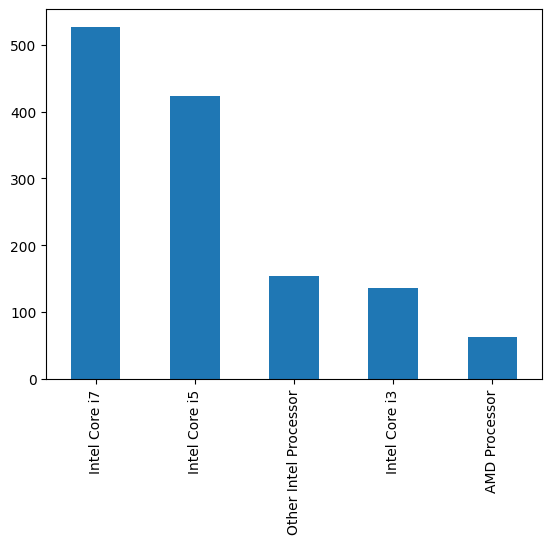

In [40]:
df['CPU_name'].value_counts().plot(kind='bar')

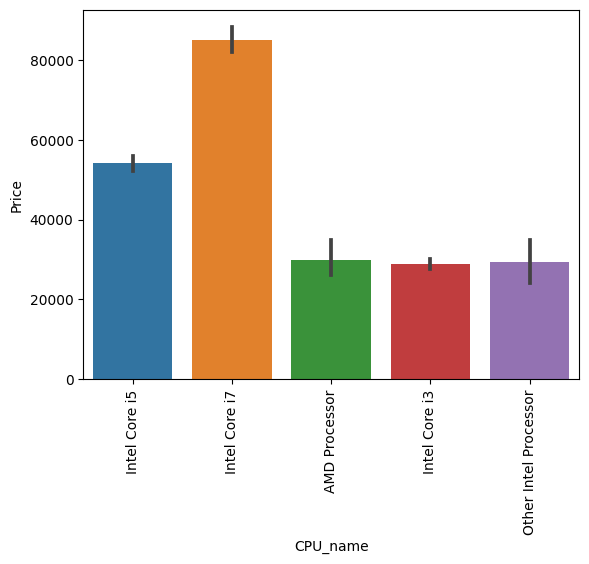

In [41]:
# price vs processor variation
sns.barplot(x=df['CPU_name'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
## dropping the cpu column

df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5


##### Analysis on the RAM column

<Axes: >

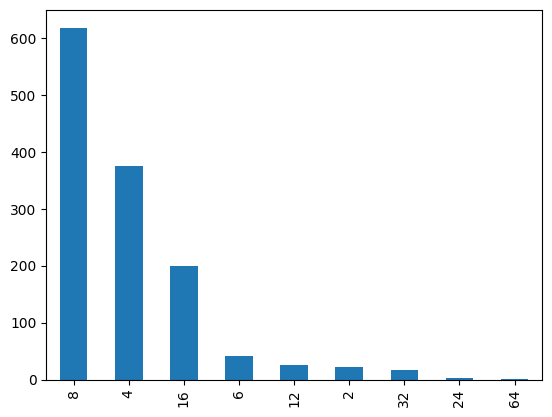

In [43]:
df['Ram'].value_counts().plot(kind='bar')

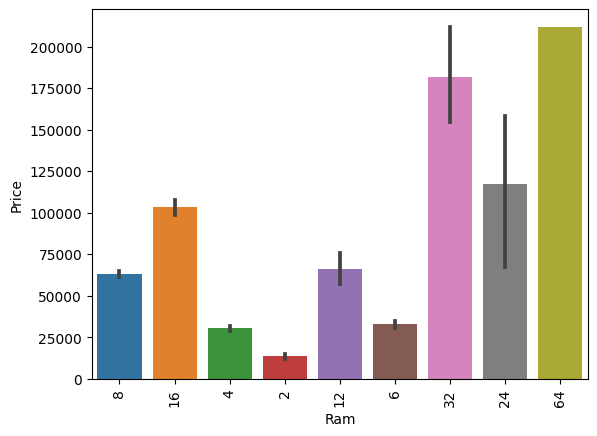

In [44]:
## ram is having good relation with price

sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

##### About the memory column

**We will seperate the `Type` of memory and the value of it,just similar to the one which is done in the previous part**

**This part involves things which are needed to be done in steps,so here we do not have the memory as a complete we have it in different dimension as `128GB SSD +  1TB HDD`,so inorder to for it come in a same dimension we need to do some modifications which are done below as shown**

In [45]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [46]:
# we have different categories and also different kinds of variations 

df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [47]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "

df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [48]:
# we will strip up all the white spaces,basically eliminating white space

df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5,256 SSD


In [49]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5,256 SSD,0,1,0,0


In [50]:
# remove all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\1491245391.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [51]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5,256,0,1,0,0,None


In [52]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
    

# remove all the characters just keep the numbers

df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\2034917926.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second'] = df['Second'].str.replace(r'\D','')


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [53]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0


In [54]:
# multiplying the elements and storing the result in subsequent columns


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])


## dropping of uncessary columns

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [55]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
819,Dell,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,1.76,40226.4000,0,0,111,Intel Core i5,500,0,0,0
601,HP,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,2.1,35616.6144,0,0,100,Intel Core i3,500,0,0,0
102,Dell,Notebook,8,1000 HDD,AMD Radeon 520,Linux,2.2,34472.1600,0,0,141,Intel Core i5,1000,0,0,0
667,HP,Notebook,8,1000 HDD,AMD Radeon 530,Windows 10,2.1,39693.6000,0,0,141,Intel Core i7,1000,0,0,0
1185,Asus,Gaming,8,256 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.591,48431.5200,0,1,141,Intel Core i7,1000,256,0,0


In [56]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
686,HP,Notebook,4,AMD Radeon 520,Windows 10,1.86,32639.8608,0,0,100,Intel Core i5,500,0,0,0
769,Acer,Notebook,4,Intel HD Graphics 505,Linux,2.1,15877.4400,0,0,100,Other Intel Processor,1000,0,0,0
1172,Asus,Notebook,4,Intel HD Graphics,Windows 10,2.2,19660.3200,0,0,100,Other Intel Processor,500,0,0,0
1259,MSI,Gaming,8,Nvidia GeForce GTX 960M,Windows 10,2.4,65481.1200,0,0,141,Intel Core i7,1000,128,0,0
167,Dell,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.56,56502.9072,0,0,141,Intel Core i7,1000,128,0,0


In [57]:
df.corr()['Price']

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473264
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

**Based on the correlation we observe that `Hybrid` and `Flash Storage` are almost negligible,so we can simply drop them off,where as HDD and SDD are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well**

In [58]:
df.columns


Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [59]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5,0,256


##### Analysis on GPU

In [60]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

**Here as we are having less data regarding the laptops,its better that we focus on `GPU brands` instead focusing on the values which are present there beside them,we will focus on the `brands`**

In [61]:
# this is what we will be doing,extracting the brands 
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


<Axes: >

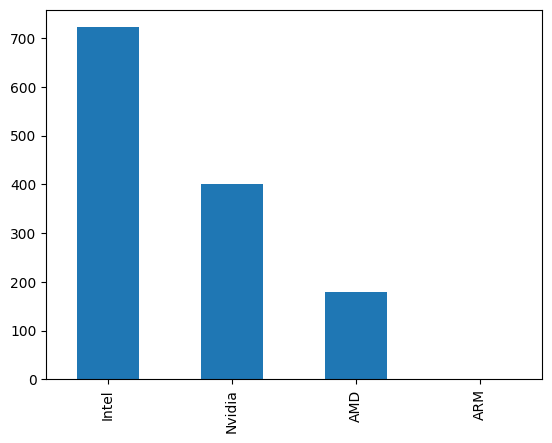

In [62]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

df['Gpu brand'].value_counts().plot(kind='bar')

<Axes: >

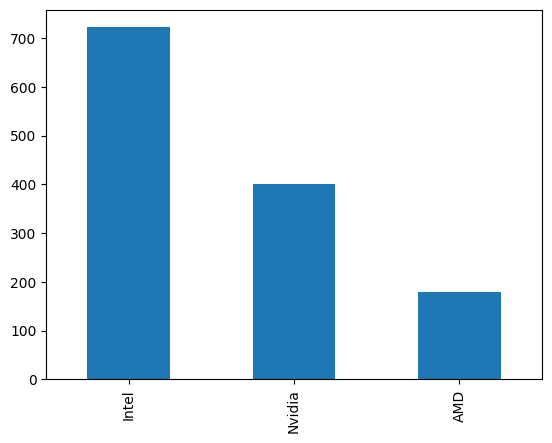

In [63]:
# removing the "ARM" tuple

df = df[df['Gpu brand']!='ARM']
df['Gpu brand'].value_counts().plot(kind='bar')

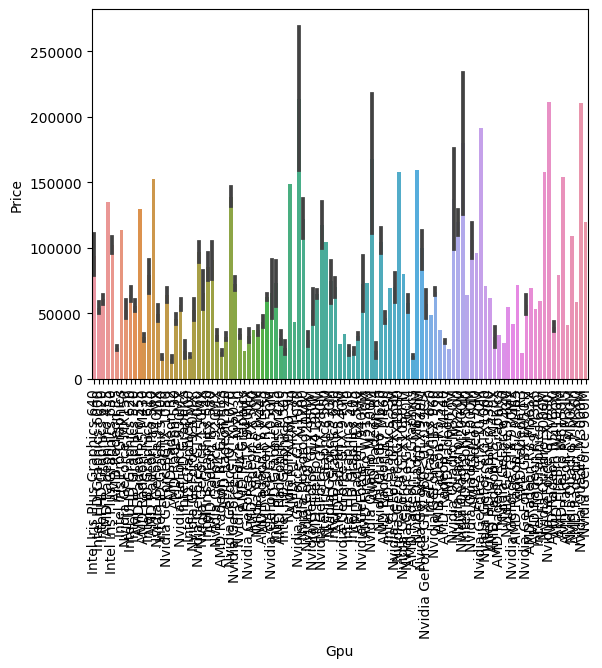

In [64]:
# price-GPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not
sns.barplot(x=df['Gpu'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()



In [65]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226,Intel Core i5,0,256,Intel


##### Operating System analysis

In [66]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

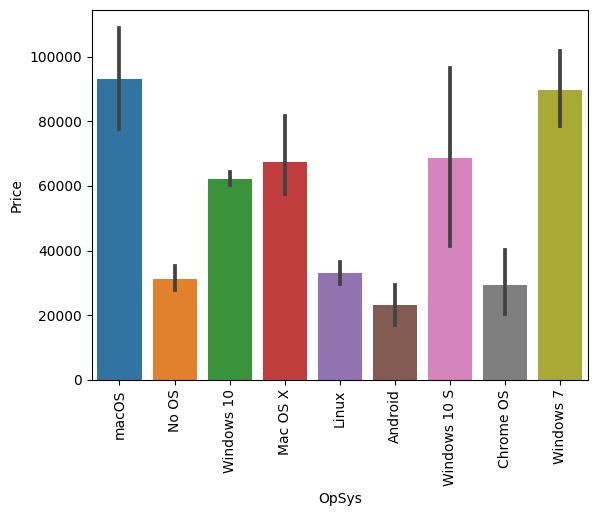

In [67]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()



In [68]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [69]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226,Intel Core i5,0,256,Intel


In [70]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
1293,Lenovo,Notebook,8,Windows,2.6,47898.7200,0,1,141,Intel Core i7,1000,0,Nvidia
570,HP,Workstation,8,Windows,3.14,99153.5472,0,0,106,Intel Core i5,500,0,Nvidia
752,Asus,Notebook,4,Other,2.45,30849.1200,0,0,100,Intel Core i5,1000,0,Nvidia
77,Dell,Notebook,8,Windows,2.02,45554.4000,0,0,141,Intel Core i7,1000,128,Intel
1152,Lenovo,Notebook,8,Other,2.32,31914.7200,0,0,141,Intel Core i5,1000,0,AMD


(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

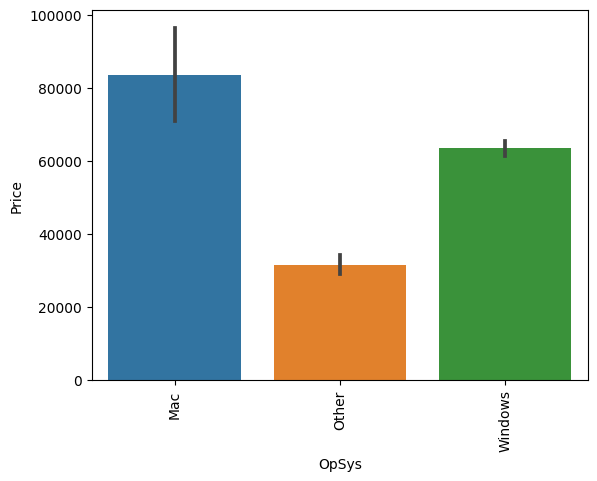

In [71]:
sn.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')

###### Weight analysis 

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\572135600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

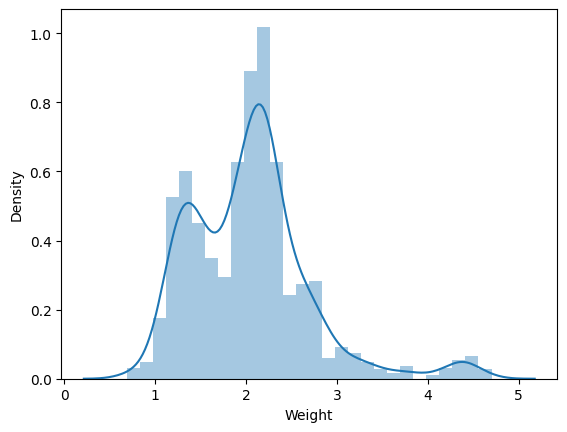

In [72]:
sn.distplot(df['Weight'])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

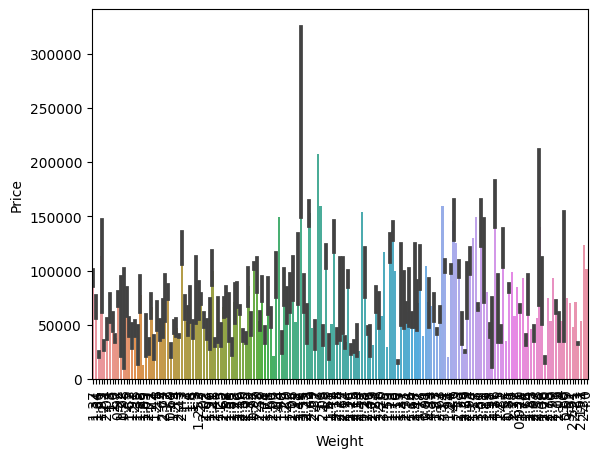

In [73]:
sn.barplot(x = df['Weight'],y = df['Price'])
plt.xticks(rotation = 'vertical')

##### Price Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\2162858153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

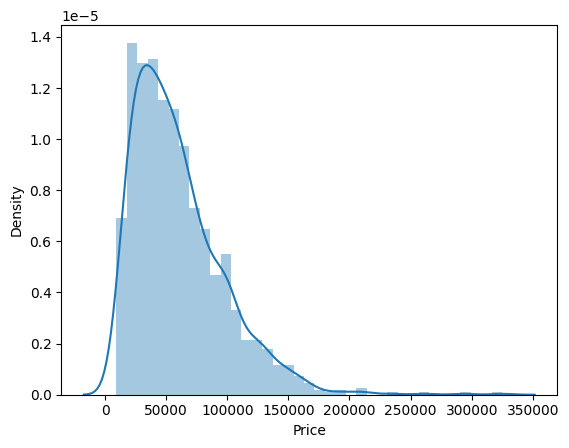

In [74]:
sn.distplot(df['Price'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\2171467043.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

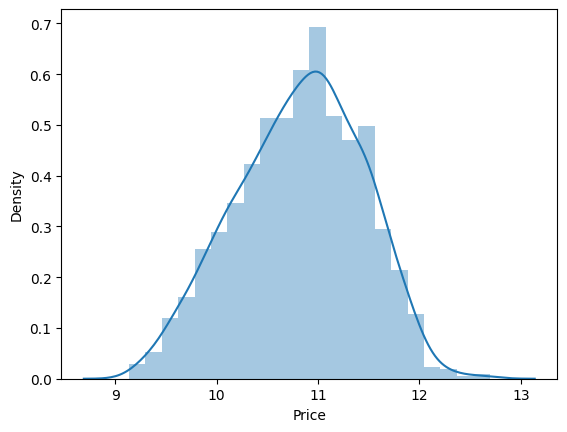

In [75]:
# so if we apply np.log to the Price col we get a gaussian distibution

sn.distplot(np.log(df['Price']))

In [76]:
## correlation with price

df.corr()['Price']

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\4080605566.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475141
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_1524\4019273308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='plasma')


<Axes: >

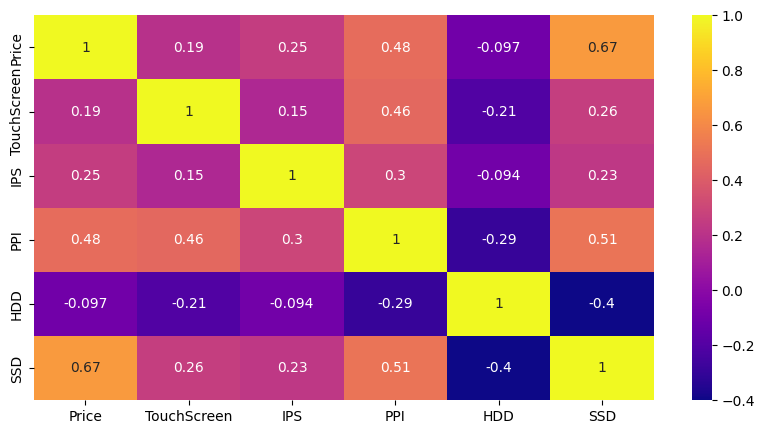

In [77]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

## Model Building


In [78]:
#df.drop(columns=['Weight','OpSys','IPS',"TypeName"],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226,Intel Core i5,0,256,Intel


In [79]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 12), (196, 12))

**There's a Class which we imported named as `Column Trasnformer` we use this widely while building our models using `Pipelines`,so for this we have to get the index numbers of the columns which are having categorical variables**

In [ ]:

mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand'}

### Linear Regression


In [ ]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!




step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')
step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])



pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print(y_pred)

R2 score 0.8072893690320188
MAE 0.2101826521119051
[10.71486874  9.68791301 10.05761601 10.36433427 10.93033629 11.4053361
 10.259209   10.40917073 11.14482258  9.59216294 10.92686992 11.03153287
 11.73893668 10.88871098 11.97783992 10.83578244 10.79764742  9.60229349
 11.38743539 11.48711762 11.67037108 11.10764498 10.81958491 11.28460454
 10.50567746 11.77057948 11.04929861 10.12791459 10.89203107 10.6230706
 11.09161183 10.02149098 10.58792479 11.05735506 11.110338   10.78760632
 10.93461906 10.95611578 11.21337964 11.43016516 11.68915251 11.26735943
  9.75276981 10.00001513 10.1997518  10.0103992  11.00711383 11.92514479
 11.52624878 10.84087694 11.5212955  11.48362852  9.75196121  9.52540916
 10.73864654 10.78381348 10.06838788 11.06489226 10.20829256 10.4734771
 10.99896493 11.10190001  9.88077516 10.47420844 10.78394066 10.55225079
 10.03207431 11.45887832 10.74636511  9.92308147 10.974378   10.74810949
 10.62076737 10.44936438 10.62569535 11.10731264 11.30841589 11.91515347
 11

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
## now mae is 0.21 so if you want to check how much difference is there do this

## we see there is a difference of 1.23 only as per the orignal value
## that is our model predicts +-0.21 more/less than the original price!

np.exp(0.21)

1.2336780599567432


### Ridge Regression

In [ ]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8126874219698053
MAE 0.20926232247323714


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### LassoRegression

In [ ]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8071176618808521
MAE 0.21115914513658704


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Decision Tree

In [ ]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8461231706429185
MAE 0.18009110328039146


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Random Forest

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8850626093257601
MAE 0.15874876706874302


In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226,Intel Core i5,0,256,Intel


In [ ]:
train.to_csv('traineddata.csv',index=None)

## Hyperparameter Tuning for Random Forest 

In [ ]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu brand']

In [ ]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


[Text(0.6382203605266019, 0.9864864864864865, 'Ram_4 <= 0.5\nsquared_error = 0.393\nsamples = 1106\nvalue = 10.822'),
 Text(0.451954849664953, 0.9594594594594594, 'SSD_0 <= 0.5\nsquared_error = 0.266\nsamples = 782\nvalue = 11.071'),
 Text(0.27639625989965017, 0.9324324324324325, 'TypeName_Notebook_0 <= 0.5\nsquared_error = 0.184\nsamples = 624\nvalue = 11.204'),
 Text(0.2049475956092646, 0.9054054054054054, 'PPI_282 <= 0.5\nsquared_error = 0.149\nsamples = 234\nvalue = 10.933'),
 Text(0.18039540712555777, 0.8783783783783784, 'Ram_16 <= 0.5\nsquared_error = 0.125\nsamples = 224\nvalue = 10.9'),
 Text(0.15291928206219374, 0.8513513513513513, 'PPI_100 <= 0.5\nsquared_error = 0.11\nsamples = 202\nvalue = 10.857'),
 Text(0.1155900520054321, 0.8243243243243243, 'Ram_6 <= 0.5\nsquared_error = 0.091\nsamples = 189\nvalue = 10.889'),
 Text(0.06856769154708338, 0.7972972972972973, 'OpSys_Windows_1 <= 0.5\nsquared_error = 0.083\nsamples = 177\nvalue = 10.917'),
 Text(0.019024851211895538, 0.7702

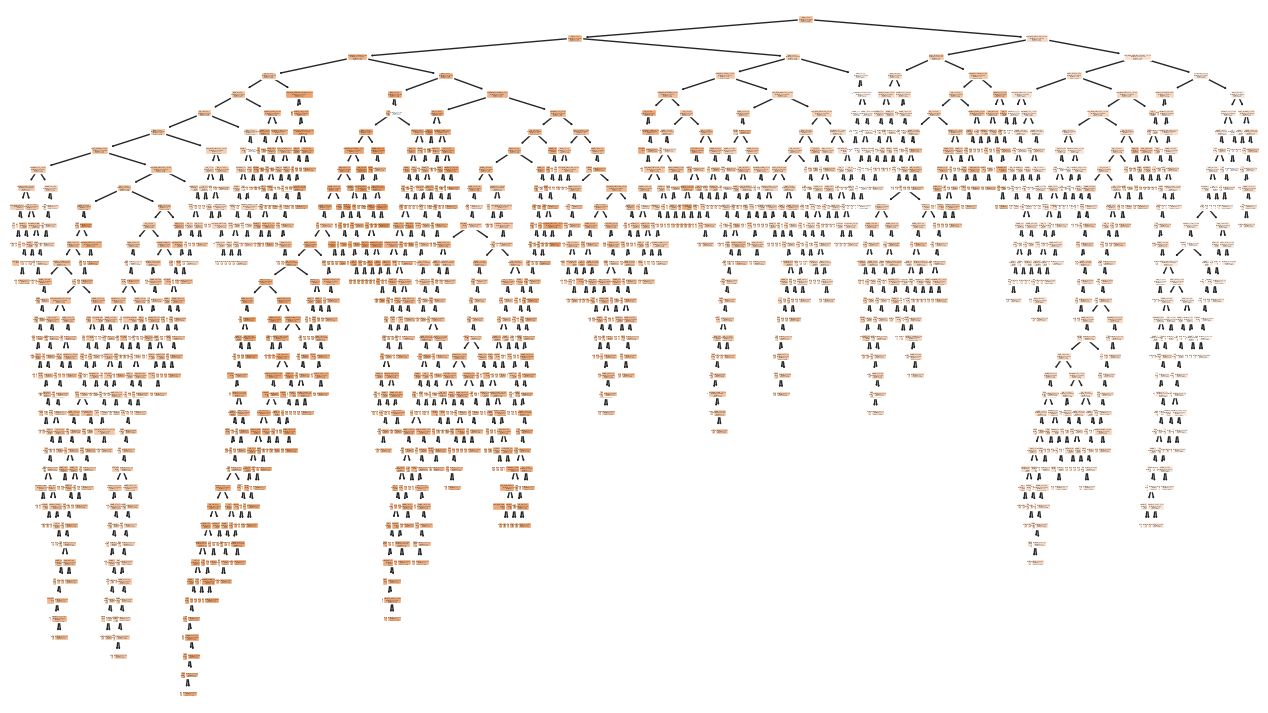

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.15, random_state=42)

# Preprocess the data using one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')
X_all = pd.concat([X_train, X_test], axis=0)
X_all_ohe = ohe.fit_transform(X_all)
X_train_ohe = X_all_ohe[:len(X_train)]
X_test_ohe = X_all_ohe[len(X_train):]

# Fit the decision tree model on the training data
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train_ohe, y_train)

# Visualize the decision tree
plt.figure(figsize=(16, 9))
tree.plot_tree(reg, filled=True, feature_names=ohe.get_feature_names_out(input_features=X_train.columns))




In [ ]:
path = reg.cost_complexity_pruning_path(X_train_ohe, y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train_ohe, y_train)
    alphalist.append(reg)

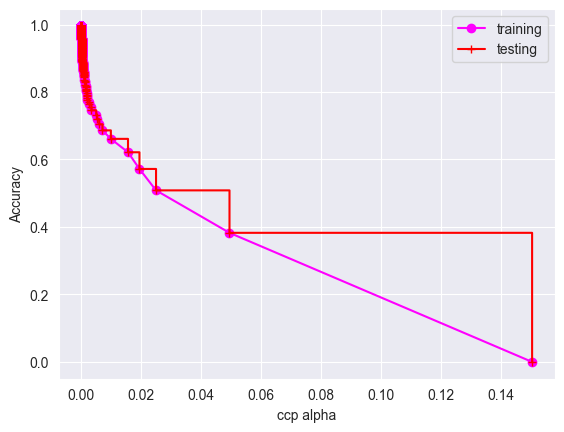

In [ ]:
train_score = [reg.score(X_train_ohe, y_train) for reg in alphalist]
test_score = [reg.score(X_train_ohe, y_train) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

**possible values of alpha can lie between `[0.0025-->0.0075]`**

[Text(0.5909090909090909, 0.9, 'Ram_4 <= 0.5\nsquared_error = 0.393\nsamples = 1106\nvalue = 10.822'),
 Text(0.36363636363636365, 0.7, 'SSD_0 <= 0.5\nsquared_error = 0.266\nsamples = 782\nvalue = 11.071'),
 Text(0.18181818181818182, 0.5, 'TypeName_Notebook_0 <= 0.5\nsquared_error = 0.184\nsamples = 624\nvalue = 11.204'),
 Text(0.09090909090909091, 0.3, 'squared_error = 0.149\nsamples = 234\nvalue = 10.933'),
 Text(0.2727272727272727, 0.3, 'Ram_8 <= 0.5\nsquared_error = 0.134\nsamples = 390\nvalue = 11.367'),
 Text(0.18181818181818182, 0.1, 'squared_error = 0.129\nsamples = 175\nvalue = 11.553'),
 Text(0.36363636363636365, 0.1, 'squared_error = 0.088\nsamples = 215\nvalue = 11.216'),
 Text(0.5454545454545454, 0.5, 'Ram_2 <= 0.5\nsquared_error = 0.245\nsamples = 158\nvalue = 10.546'),
 Text(0.45454545454545453, 0.3, 'squared_error = 0.146\nsamples = 143\nvalue = 10.653'),
 Text(0.6363636363636364, 0.3, 'squared_error = 0.045\nsamples = 15\nvalue = 9.525'),
 Text(0.8181818181818182, 0.7, 

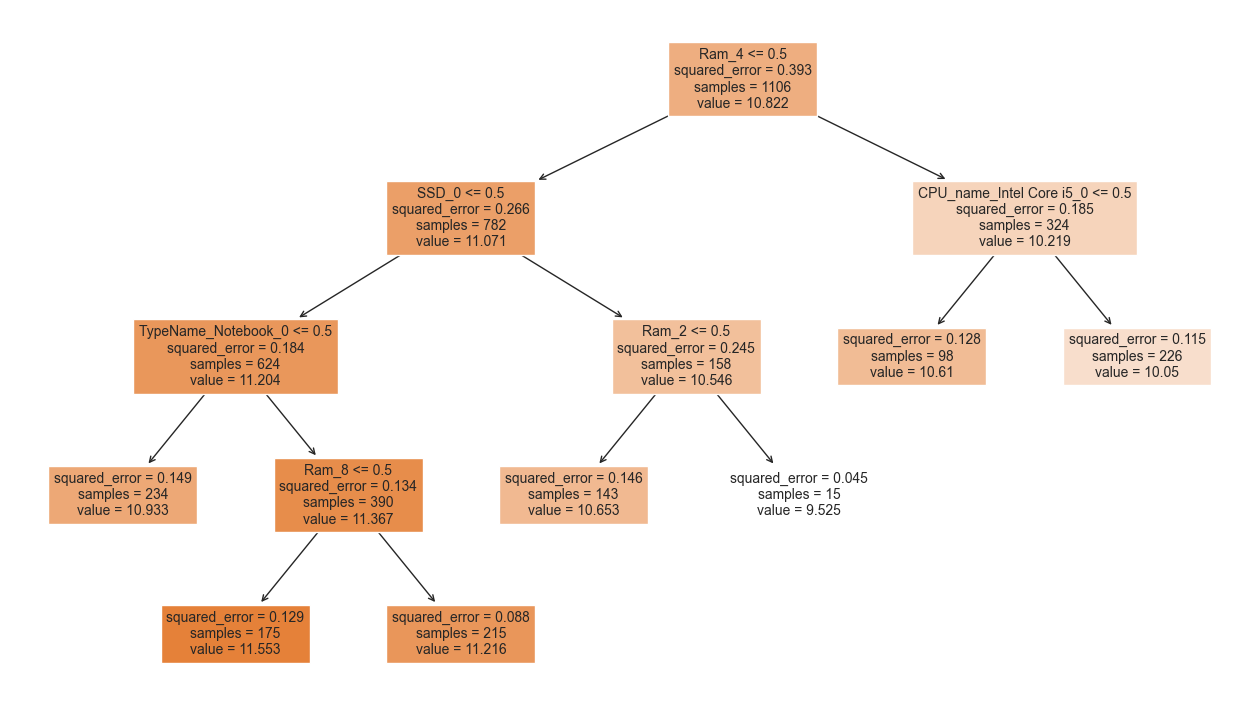

In [ ]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train_ohe, y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg, filled=True, feature_names=ohe.get_feature_names_out(input_features=X_train.columns))



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X_train_ohe = X_train_ohe.astype(str)
# Preprocess the data using one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')
X_all = pd.concat([X_train, X_test], axis=0)
X_all_ohe = ohe.fit_transform(X_all)
X_train_ohe = X_all_ohe[:len(X_train)]
X_test_ohe = X_all_ohe[len(X_train):]

params= {
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':['squared_error', 'absolute_error', 'friedman_mse'],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}





In [ ]:

scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],
                            cv=5,
                            n_iter=50,
                            scoring='neg_mean_squared_error',
                            error_score='raise',
                            verbose=2)
    clf.fit(X_train_ohe, y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })




Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  53.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  53.2s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  53.6s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  54.4s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  53.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=   2.2s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=   2.2s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=   2.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=   2.1s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=   2.2s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466; total time=  14.9s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466; total time=  17.1s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466; total time=  16.4s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466; total time=  16.8s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466; total time=  16.9s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  40.4s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  39.9s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  41.6s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  41.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  39.8s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   1.0s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   1.0s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   1.1s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   0.9s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   0.9s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   7.2s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   5.9s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   5.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   5.4s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   5.8s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   5.3s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   5.3s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   5.4s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   5.2s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   5.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=833; total time= 1.2min


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=833; total time= 1.3min


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=833; total time= 1.3min


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=833; total time= 1.4min


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=833; total time= 1.3min


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=  26.1s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=  13.9s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   7.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   7.6s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   7.6s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.3s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.3s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.3s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.3s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.3s
[CV] END ccp_alpha=0.0

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   3.4s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   3.4s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   3.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   3.5s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   4.1s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=  10.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=  10.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=  10.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=  10.1s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=  10.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=222; total time=   0.2s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=222; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=222; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=222; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=222; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=  14.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=  14.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=  14.1s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=  14.4s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=  14.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=833; total time=   5.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=833; total time=   5.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=833; total time=   5.9s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=833; total time=   5.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=833; total time=   6.9s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=   5.5s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=   5.2s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=   4.9s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=   4.8s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=   5.1s
[CV] END ccp_alpha=0.0125,

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=466; total time=   6.9s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=466; total time=   6.9s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=466; total time=   7.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=466; total time=   7.6s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=466; total time=   7.5s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=833; total time=   2.6s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=833; total time=   2.8s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=833; total time=   5.7s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=833; total time=   7.5s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=833; total time=   8.6s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  20.4s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  12.5s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  12.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  13.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  38.4s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=711; total time=   1.8s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=711; total time=   1.6s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=711; total time=   1.9s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=711; total time=   1.9s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=711; total time=   1.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=466; total time=  29.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=466; total time= 1.1min


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=466; total time=  25.1s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=466; total time=  25.9s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=466; total time=  23.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=  16.7s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=  25.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=  16.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=  33.6s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=  26.8s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.3s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.6s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   5.8s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.6s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.5s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   1.4s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   1.5s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   1.5s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   1.5s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   1.5s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=344; total time=   0.6s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=344; total time=   0.5s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=344; total time=   0.6s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=344; total time=   0.6s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=344; total time=   0.6s
[CV] END ccp_alpha=0.0025, crite

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   2.4s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   2.2s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   2.1s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   2.1s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=222; total time=   2.1s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=711; total time=   1.4s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=711; total time=   1.4s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=711; total time=   1.4s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=711; total time=   1.5s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=711; total time=   1.8s
[CV] END ccp_a

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=  31.5s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=  30.1s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=  30.1s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=  29.4s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=  29.3s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=955; total time=   6.5s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=955; total time=   6.8s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=955; total time=   6.6s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=955; total time=   6.7s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=955; total time=   6.9s
[CV] END ccp_alpha=0.0025, cri

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.

[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.

[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.9s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=14; total ti

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; 

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.005, criterion=friedman_mse, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.8s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.7s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.

[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=friedman_mse, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2; total time=

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.

[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; 

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=14; total time=   0.3s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.

[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total 

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=5; tota

C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.3s


C:\Users\heba1\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.082129,"(DecisionTreeRegressor(ccp_alpha=0.0025, crite..."
1,Decision Tree,-0.092321,"DecisionTreeRegressor(ccp_alpha=0.0025, criter..."


In [ ]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.08212871296789373,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='friedman_mse', max_depth=15,
                        max_features='auto', min_samples_leaf=2,
                        min_samples_split=10, n_estimators=955)},
 {'model_name': 'Decision Tree',
  'best_score': -0.09232065732313552,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0025, criterion='absolute_error', max_depth=8,
                        max_features='auto', min_samples_leaf=2,
                        min_samples_split=10)}]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pandas as pd



# Encode categorical variables in X_train and X_test
X_train_ohe = pd.get_dummies(X_train)
X_test_ohe = pd.get_dummies(X_test)

# Fill missing values in X_train_ohe and X_test_ohe
X_train_ohe = X_train_ohe.fillna(X_train_ohe.mean())
X_test_ohe = X_test_ohe.fillna(X_train_ohe.mean())

# Convert y_train and y_test to numerical type
y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)

# Train the random forest regressor
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)
rf.fit(X_train_ohe, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_ohe)

# Calculate R-squared score
r2_score = metrics.r2_score(y_test, y_pred)
print("R-squared score:", r2_score)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Weight_1.55
- Weight_2.591
- Weight_2.67
- Weight_2.83
- Weight_3.42
- ...
Feature names seen at fit time, yet now missing:
- Ram_64
- Weight_0.69
- Weight_0.81
- Weight_0.91
- Weight_0.920
- ...


## Prediction on the whole Dataset



In [ ]:
train


In [ ]:
# encode the categorical features in the train dataset
train_encoded = pd.get_dummies(train, columns=['CPU_name', 'Gpu brand'])

# encode the categorical features in the test dataset
test_encoded = pd.get_dummies(test, columns=['CPU_name', 'Gpu brand'])

# match the columns in the test dataset with the columns in the train dataset
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0
test_encoded = test_encoded[train_encoded.columns]

# create an empty list for the predictions
predicted = []

# convert the train dataset to a numpy array
testtrain = np.array(train_encoded)

# loop through each row in the train dataset and predict the target variable
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))

predicted



In [ ]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [ ]:
df['Predicted Price'] = np.array(ans)
df

In [ ]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# Random Forest Regressor version_2

In [ ]:
# Encode categorical variables in X_train and X_test
X_train_ohe = pd.get_dummies(X_train)
X_test_ohe = pd.get_dummies(X_test)

# Fill missing values in X_train_ohe and X_test_ohe
X_train_ohe = X_train_ohe.fillna(X_train_ohe.mean())
X_test_ohe = X_test_ohe.fillna(X_train_ohe.mean())

# Convert y_train and y_test to numerical type
y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)

# Train the random forest regressor
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
rf1.fit(X_train_ohe, y_train)

# Make predictions on the test set
y_pred = rf1.predict(X_test_ohe)

# Calculate R-squared score
r2_score = metrics.r2_score(y_test, y_pred)
print("R-squared score:", r2_score)


In [ ]:
# encode the categorical features in the train dataset
train_encoded = pd.get_dummies(train, columns=['CPU_name', 'Gpu brand'])

# encode the categorical features in the test dataset
test_encoded = pd.get_dummies(test, columns=['CPU_name', 'Gpu brand'])

# match the columns in the test dataset with the columns in the train dataset
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0
test_encoded = test_encoded[train_encoded.columns]

# create an empty list for the predictions
predicted = []

# convert the train dataset to a numpy array
testtrain = np.array(train_encoded)

# loop through each row in the train dataset and predict the target variable
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))

predicted



In [ ]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]


In [ ]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

In [ ]:
sn.distplot(data['Price'],hist=False,color='orange',label='Actual')
sn.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [ ]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()

In [ ]:
X_train.iloc[0]